# Feature Engineering

## Missing Data, Outliers Handling, Cardinality

## Visualisasi Encoding (One-Hot)

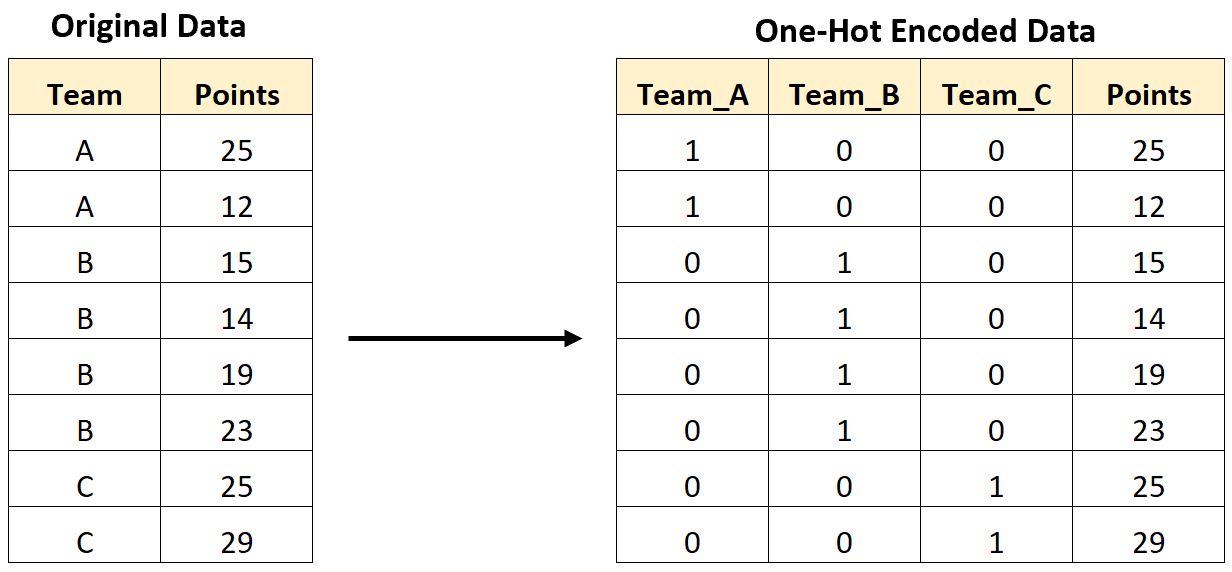

Kelemahan one-hot encoding membuat jumlah kolom menjadi lebih banyak

## Missing Data Imputation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
mpl.style.use('Solarize_Light2')

import warnings
warnings.filterwarnings('ignore')

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Regression Metrics
from sklearn.metrics import mean_squared_error

# CLassification Metric
from sklearn.metrics import roc_auc_score

## Missing Value Category

### A.3.1 Missing Completely at Random (MCAR)

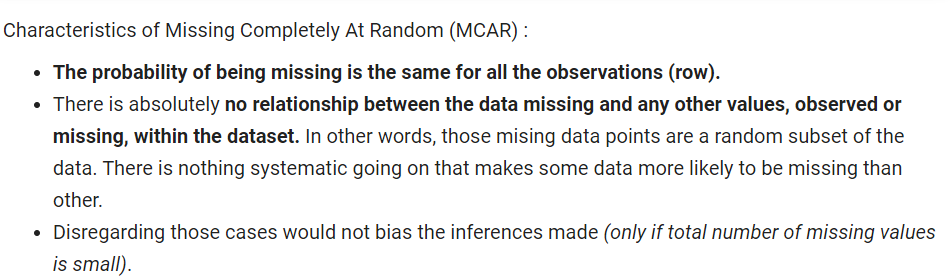

In [2]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df_titanic[df_titanic.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


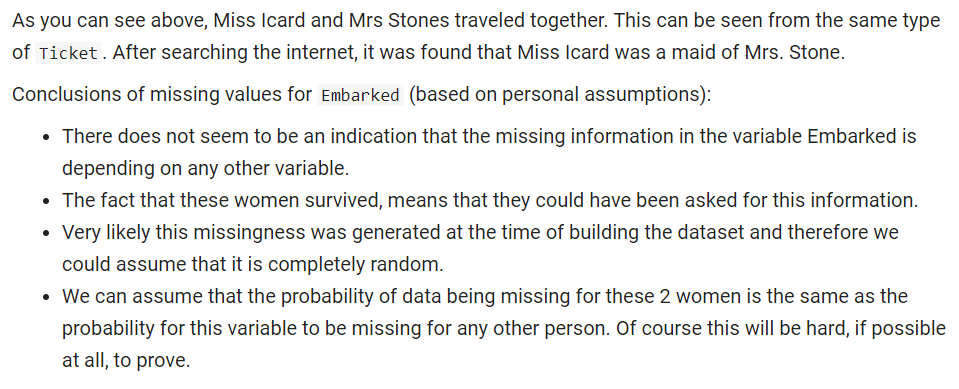

### A.3.2 Missing Not at Random (MNAR)

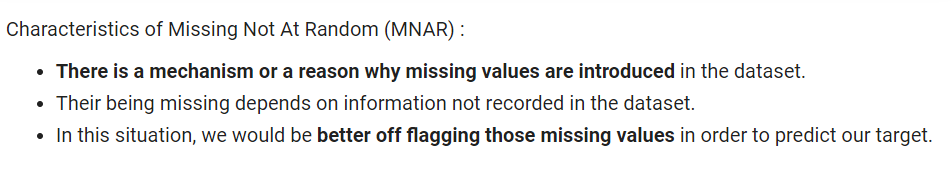

In [5]:
df_titanic[df_titanic.Cabin.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
df_titanic[df_titanic.Cabin.isna()].Survived.value_counts()

0    481
1    206
Name: Survived, dtype: int64

In [7]:
df_titanic[df_titanic.Age.isna()].Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

Kolom Age dan Kolom Cabin bukan memiliki nilai Null secara random tetapi ada alasan dibalik ketiadaan datanya.

**Flagging**

In [8]:
df_titanic_2 = df_titanic.copy()
df_titanic_2['cabin_null'] = np.where(df_titanic_2.Cabin.isna(),1,0)
df_titanic_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [9]:
# Data Grouping Survived vs not survived
print('Value Counts')
print(df_titanic_2.groupby('Survived')['cabin_null'].value_counts())

Value Counts
Survived  cabin_null
0         1             481
          0              68
1         1             206
          0             136
Name: cabin_null, dtype: int64


In [10]:
print('Mean')
print(df_titanic_2.groupby('Survived')['cabin_null'].mean())

Mean
Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64


In [11]:
df_titanic_2['age_null'] = np.where(df_titanic_2.Age.isna(),1,0)
df_titanic_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,age_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [12]:
print('Value Counts')
print(df_titanic_2.groupby('Survived')['age_null'].value_counts())

Value Counts
Survived  age_null
0         0           424
          1           125
1         0           290
          1            52
Name: age_null, dtype: int64


In [13]:
print('Mean')
print(df_titanic_2.groupby('Survived')['age_null'].mean())

Mean
Survived
0    0.227687
1    0.152047
Name: age_null, dtype: float64


## Missing Value Handling Methods

### Complete Case Analysis

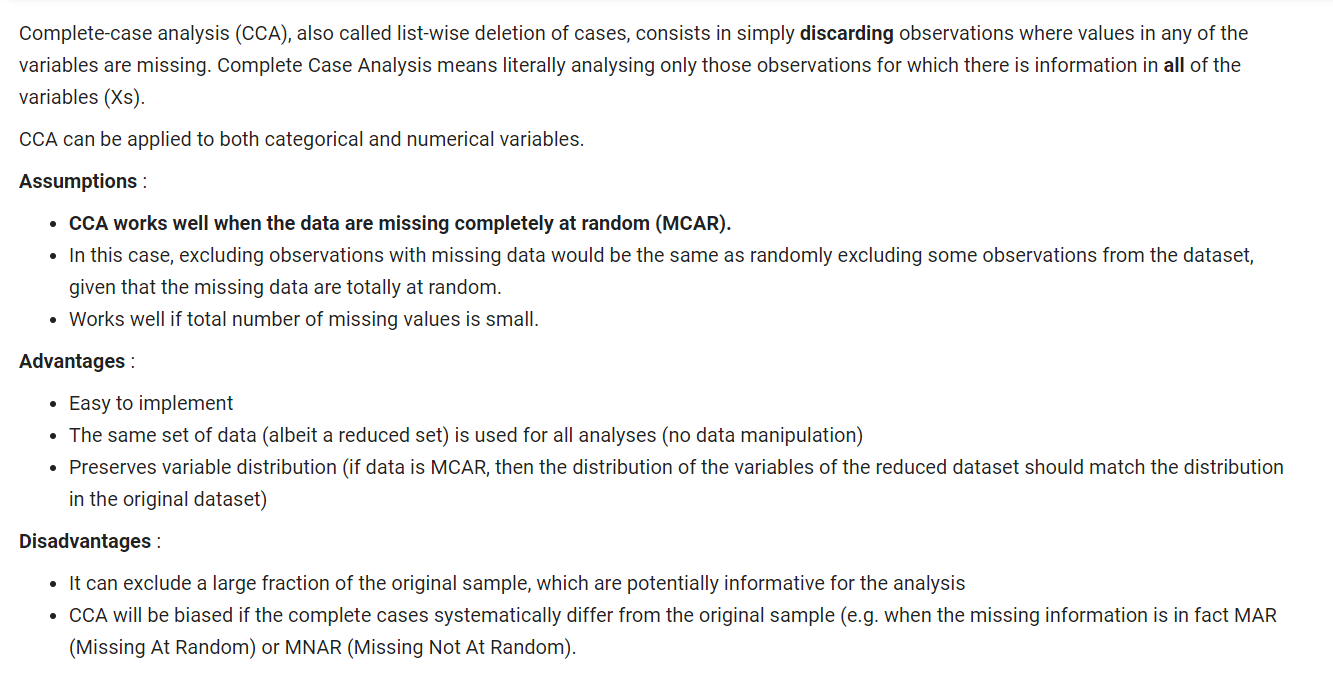

In [14]:
df_titanic_2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
cabin_null       0
age_null         0
dtype: int64

In [15]:
print('Total Passengers in Titanic = ', len(df_titanic))
print('Total Passengers in Titanic after dropping null = ', len(df_titanic.dropna()))
print('Percentage of Missing data when dropped', ((len(df_titanic)-len(df_titanic.dropna()))/len(df_titanic))*100, '%')

Total Passengers in Titanic =  891
Total Passengers in Titanic after dropping null =  183
Percentage of Missing data when dropped 79.46127946127946 %


In [16]:
df_titanic_2[df_titanic_2.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,age_null
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,0


Metode CCA (drop baris yang mengandung Null) tidak cocok untuk data null yang berlebih dan missing values non random, Sehingga apanila ingin teteap menggunakan CCA bisa pada kolom Embarked

### Mean Median Imputation

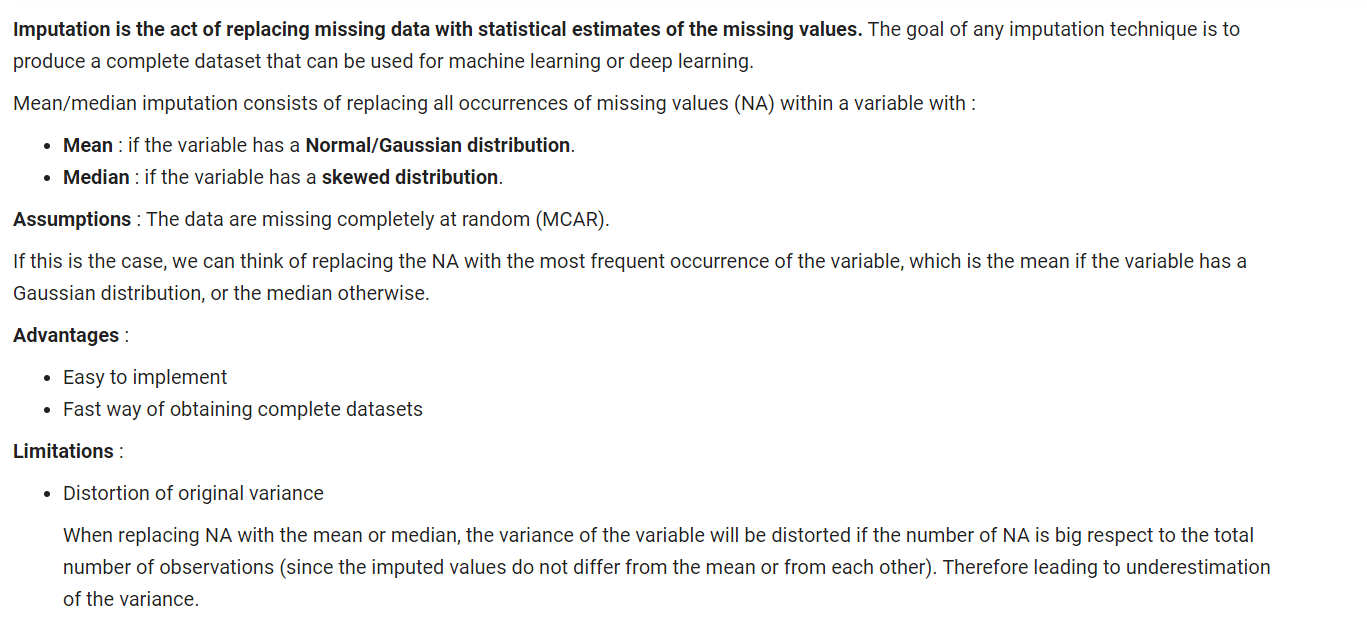
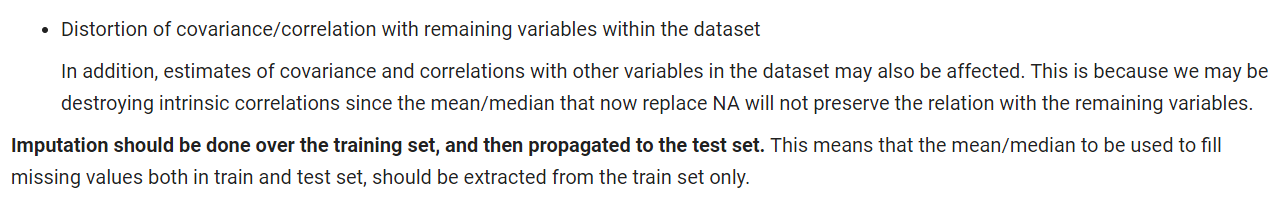

Median tidak sensitif dengan adanya outlier sehingga apabila data yang dimiliki cendrung skewed bisa menggunakan median imputation

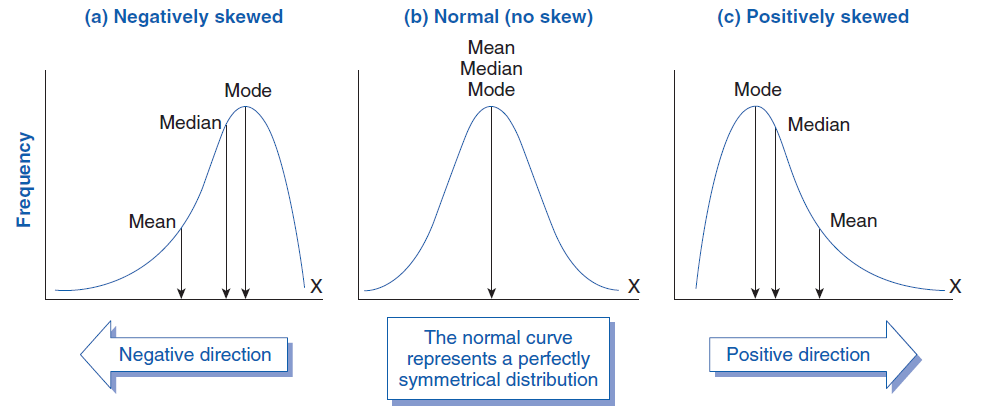

In [35]:
df_titanic_3 = df_titanic.copy()
X = df_titanic_3
y = df_titanic_3['Survived']
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X,y,test_size=0.3, random_state=0)

X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

In [36]:
X_train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S


<AxesSubplot:>

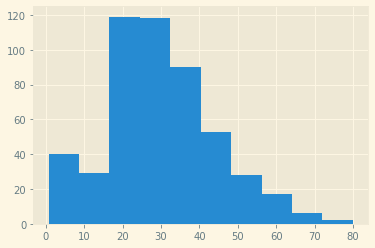

In [37]:
X_train_titanic.Age.hist()

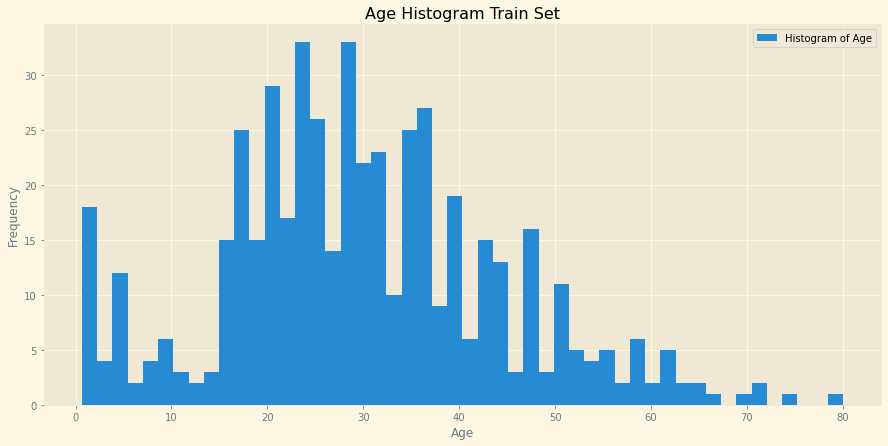

In [38]:
fig, ax = plt.subplots(1,1, figsize=(15,7))

X_train_titanic.Age.hist(bins=50, ax=ax, label='Histogram of Age')
ax.set_title('Age Histogram Train Set')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

In [39]:
print('Skewness :', X_train_titanic.Age.skew())

Skewness : 0.3361317253050765


In [40]:
print('Mean Age', X_train_titanic.Age.mean())
print('Median Age', X_train_titanic.Age.median())

Mean Age 29.915338645418327
Median Age 29.0


In [41]:
def impute_na(df, variable,mean_value, median_value):
    df[variable + '_mean'] = df[variable].fillna(mean_value)
    df[variable + '_median'] = df[variable].fillna(median_value)
    df[variable + '_zero'] = df[variable].fillna(0)
    
    return df

In [42]:
age_mean = X_train_titanic.Age.mean()
age_median = X_train_titanic.Age.median()

In [43]:
X_train_titanic = impute_na(X_train_titanic,'Age',age_mean,age_median)
X_test_titanic = impute_na(X_test_titanic,'Age',age_mean,age_median)

In [44]:
X_train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0


In [45]:
# Standard Deviation dari data

print('STD - Original', X_train_titanic['Age'].std())
print('STD - After Median Imputation', X_train_titanic['Age_median'].std())
print('STD - After Median Imputation', X_train_titanic['Age_mean'].std())
print('STD - After Median Imputation', X_train_titanic['Age_zero'].std())

STD - Original 14.506993804588443
STD - After Median Imputation 13.024746215318798
STD - After Median Imputation 13.019703562523883
STD - After Median Imputation 17.60095360447329


In [46]:
X_train_titanic['Age_zero']

857    51.0
52     49.0
386     1.0
124    54.0
578     0.0
       ... 
835    39.0
192    19.0
629     0.0
559    36.0
684    60.0
Name: Age_zero, Length: 623, dtype: float64

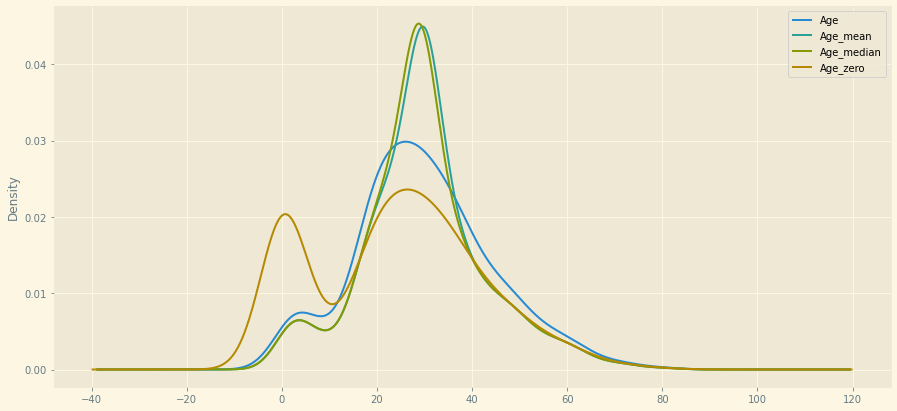

In [47]:
# Visualisasi Variabel age pada seluruh metode Imputation

fig, ax = plt.subplots(1,1, figsize=(15,7))
X_train_titanic.Age.plot(kind='kde', ax=ax)
X_train_titanic.Age_mean.plot(kind='kde', ax=ax)
X_train_titanic.Age_median.plot(kind='kde', ax=ax)
X_train_titanic.Age_zero.plot(kind='kde', ax=ax)
plt.legend()
plt.show()

In [48]:
print('Kurtosis Original', X_train_titanic.Age.kurtosis())
print('Kurtosis Mean Imputed', X_train_titanic.Age_mean.kurtosis())
print('Kurtosis Median Imputed', X_train_titanic.Age_median.kurtosis())

Kurtosis Original 0.24738182377613738
Kurtosis Mean Imputed 1.030128637102929
Kurtosis Median Imputed 1.045538700158997


### Komparasi Metrics antar Imputing Method

In [49]:
# Model Impute Zero

rf_zero = RandomForestClassifier(n_estimators=100,random_state=20,max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero','Fare']],y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero',"Fare"]])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero','Fare']])

print('Train Zero')
print('RF roc-auc',roc_auc_score(y_train_titanic,pred_zero_train[:,1]))
print('Test Zero')
print('RF roc-auc',roc_auc_score(y_test_titanic,pred_zero_test[:,1]))

#Model Impute Mean

rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Train set mean imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test set mean imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Train set median imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test set median imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))

Train Zero
RF roc-auc 0.7623804255872975
Test Zero
RF roc-auc 0.7513988095238096
Train set mean imputation
Random Forests roc-auc: 0.751648554261296
Test set mean imputation
Random Forests roc-auc: 0.7698809523809523
Train set median imputation
Random Forests roc-auc: 0.7515021366130887
Test set median imputation
Random Forests roc-auc: 0.7697619047619049


In [50]:
X_train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0


In [51]:
print('Average Survival of Children : ',X_train_titanic[X_train_titanic.Age<15].Survived.mean())
print('Average Survival of Childred imputed with zeroes', X_train_titanic[X_train_titanic.Age_zero<15].Survived.mean())
print('Average Survival of Childred imputed with mean', X_train_titanic[X_train_titanic.Age_mean<15].Survived.mean())
print('Average Survival of Childred imputed with median', X_train_titanic[X_train_titanic.Age_median<15].Survived.mean())

Average Survival of Children :  0.5740740740740741
Average Survival of Childred imputed with zeroes 0.38857142857142857
Average Survival of Childred imputed with mean 0.5740740740740741
Average Survival of Childred imputed with median 0.5740740740740741


In [ ]:
print('Average Survival of Passengers', X_train_titanic.Survived.mean())

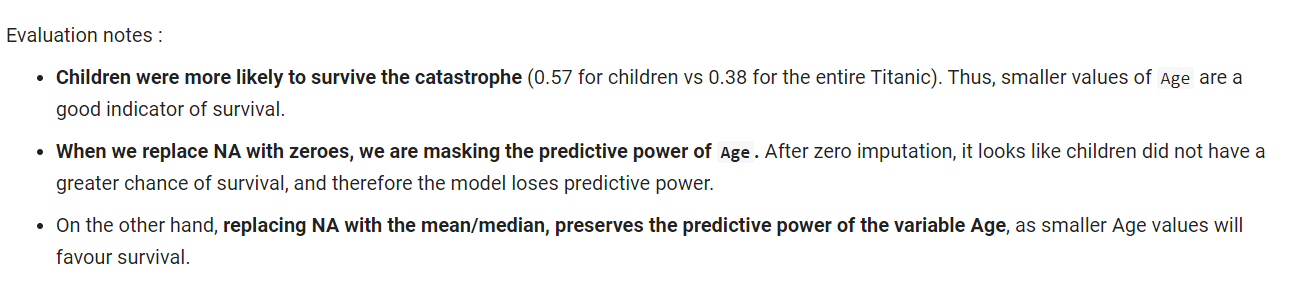

### Random Sample Imputation

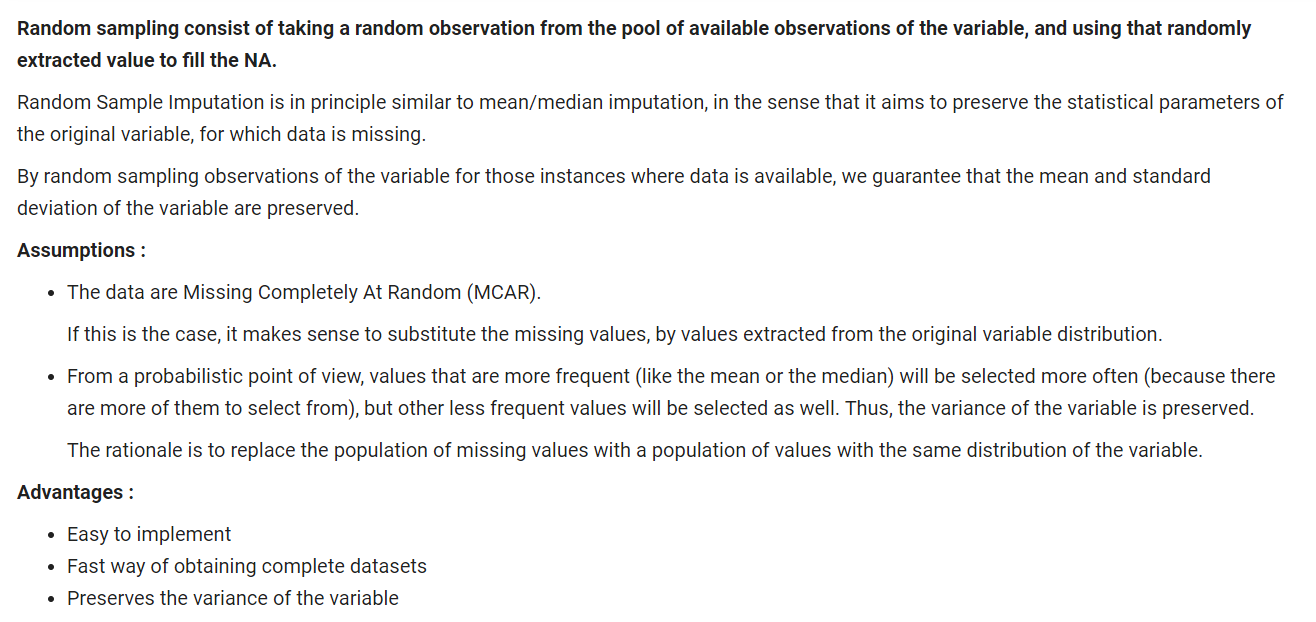

In [52]:
df_titanic_4 = df_titanic.copy()
x = df_titanic_4
y = df_titanic.Survived
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [53]:
def impute_na_rand(df, variable,mean_value, median_value):
    df[variable + '_mean'] = df[variable].fillna(mean_value)
    df[variable + '_median'] = df[variable].fillna(median_value)
    df[variable + '_zero'] = df[variable].fillna(0)
    df[variable + '_random'] = df[variable]    
    
    ## Extract Random Sample to Impute na
    random_sample = df[variable].dropna().sample(df[variable].isna().sum(), random_state=0)
    
    ## pandas need to have some index in order merge dataset
    random_sample.index = df[df[variable].isna()].index
    
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    
    return df

In [54]:
age_median = X_train.Age.median()
age_mean = X_train.Age.mean()

In [55]:
X_train = impute_na_rand(X_train, 'Age', age_mean,age_median)
X_test = impute_na_rand(X_test, 'Age', age_mean,age_median)
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_random
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0,39.0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0,19.0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0,14.5
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0,36.0


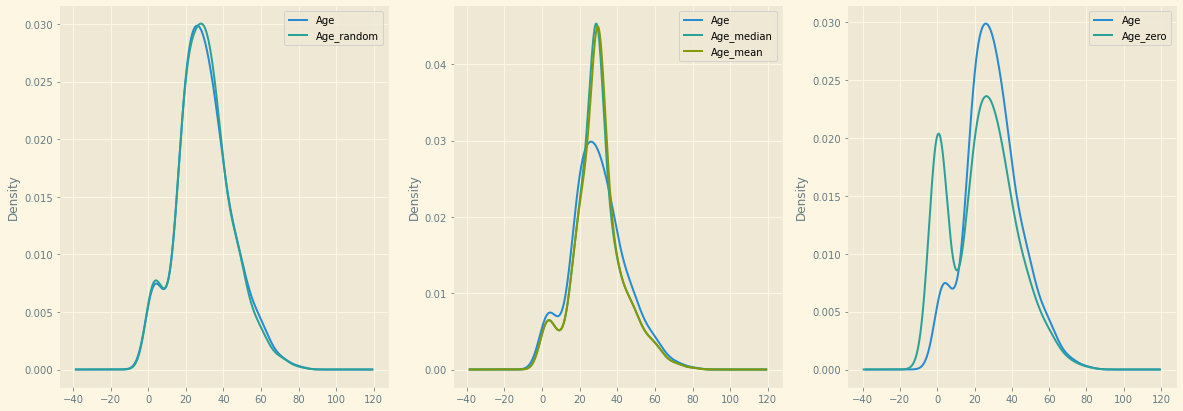

In [56]:
fig,ax = plt.subplots(1,3, figsize=(20,7))

X_train.Age.plot(kind='kde',ax=ax[0])
X_train.Age_random.plot(kind='kde',ax=ax[0])
lines,labels = ax[0].get_legend_handles_labels()
ax[0].legend()

X_train.Age.plot(kind='kde',ax=ax[1])
X_train.Age_median.plot(kind='kde',ax=ax[1])
X_train.Age_mean.plot(kind='kde',ax=ax[1])

lines,labels = ax[0].get_legend_handles_labels()
ax[1].legend()

X_train.Age.plot(kind='kde',ax=ax[2])
X_train.Age_zero.plot(kind='kde',ax=ax[2])

lines,labels = ax[0].get_legend_handles_labels()
ax[2].legend()
plt.show()

In [57]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train[['Age_zero', 'Fare']], y_train)

pred_zero_train = rf_zero.predict_proba(X_train[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train[['Age_mean', 'Fare']], y_train)

pred_mean_train = rf_mean.predict_proba(X_train[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train[['Age_median', 'Fare']], y_train)

pred_median_train = rf_median.predict_proba(X_train[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_random.fit(X_train[['Age_random', 'Fare']], y_train)

pred_random_train = rf_random.predict_proba(X_train[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_random_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7555855621353116
Test - Random Forests roc-auc. : 0.7490476190476191

Using mean imputation
Train - Random Forests roc-auc : 0.751648554261296
Test - Random Forests roc-auc  : 0.7698809523809523

Using median imputation
Train - Random Forests roc-auc : 0.7515021366130887
Test - Random Forests roc-auc. : 0.7697619047619049

Using random sample imputation
Train - Random Forests roc-auc : 0.7542027287911325
Test - Random Forests roc-auc. : 0.7532142857142858



In [58]:
df_titanic_5 = df_titanic.copy()
X_5 = df_titanic_5
y_5 = df_titanic_5.Survived

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X,y,test_size=0.3, random_state=0)
X_train_5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S


In [59]:
def impute_na_flag(df, variable,mean_value, median_value):
    df[variable + '_mean'] = df[variable].fillna(mean_value)
    df[variable + '_median'] = df[variable].fillna(median_value)
    df[variable + '_zero'] = df[variable].fillna(0)
    df[variable + '_random'] = df[variable]    
    
    ## Extract Random Sample to Impute na
    random_sample = df[variable].dropna().sample(df[variable].isna().sum(), random_state=0)
    
    ## pandas need to have some index in order merge dataset
    random_sample.index = df[df[variable].isna()].index
    
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    
    df[variable +'_NA']= np.where(df[variable].isna(),1,0)
    return df

In [60]:
age_mean = X_train_5.Age.mean()
age_median = X_train_5.Age.median()

In [61]:
X_train_5 = impute_na_flag(X_train_5,'Age',age_mean,age_median)
X_test_5 = impute_na_flag(X_test_5,'Age',age_mean,age_median)

In [62]:
X_train_5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_random,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0,39.0,0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0,19.0,0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0,14.5,1
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0,36.0,0


In [63]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train_5[['Age_zero', 'Fare']], y_train)

pred_zero_train = rf_zero.predict_proba(X_train_5[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_5[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train[['Age_mean', 'Fare']], y_train)

pred_mean_train = rf_mean.predict_proba(X_train[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train[['Age_median', 'Fare']], y_train)

pred_median_train = rf_median.predict_proba(X_train[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_random.fit(X_train[['Age_random', 'Fare']], y_train)

pred_random_train = rf_random.predict_proba(X_train[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_random_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7555855621353116
Test - Random Forests roc-auc. : 0.7490476190476191

Using mean imputation
Train - Random Forests roc-auc : 0.751648554261296
Test - Random Forests roc-auc  : 0.7698809523809523

Using median imputation
Train - Random Forests roc-auc : 0.7515021366130887
Test - Random Forests roc-auc. : 0.7697619047619049

Using random sample imputation
Train - Random Forests roc-auc : 0.7542027287911325
Test - Random Forests roc-auc. : 0.7532142857142858



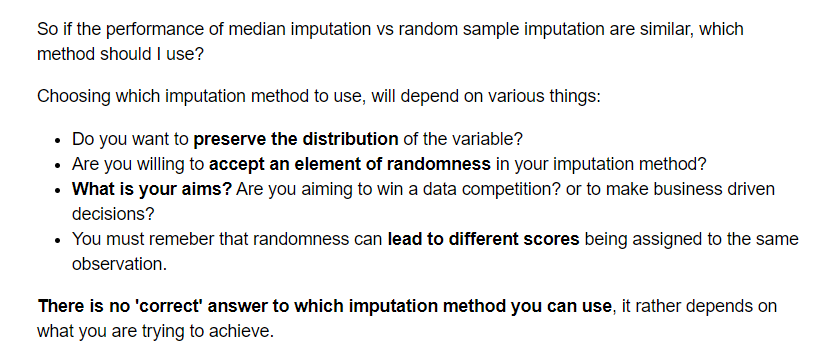

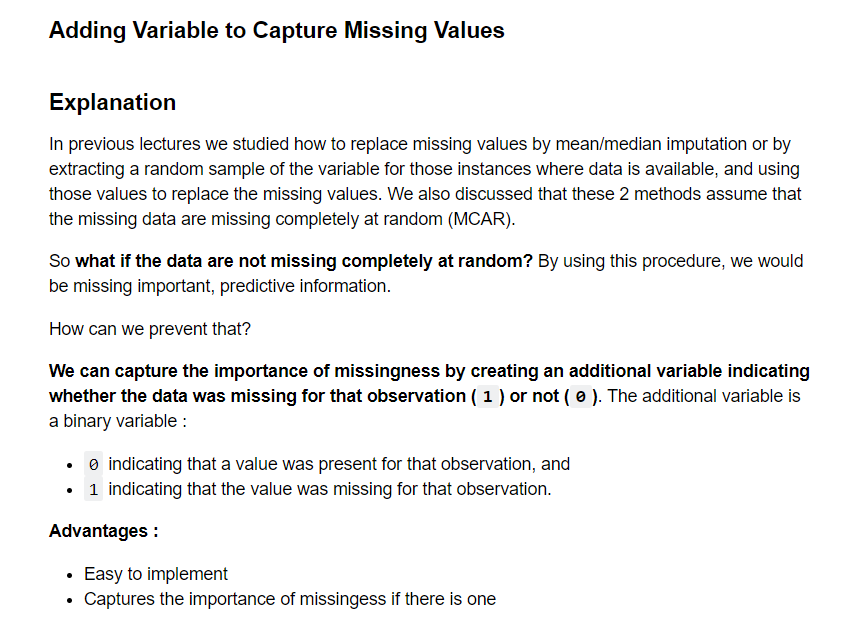

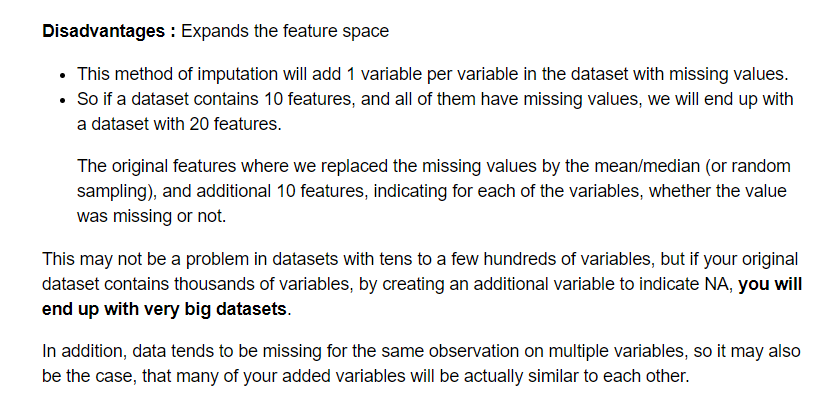

In [64]:
df_titanic_5 = df_titanic.copy()
X_5 = df_titanic_5
y_5 = df_titanic_5.Survived

X_train_5,X_test_5,y_train_5,y_test_5 = train_test_split(X,y,test_size=0.3, random_state=0)
X_train_5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S


In [65]:
def impute_na_flag(df,variable,mean_value,median_value):
    df[variable + '_mean'] = df[variable].fillna(mean_value)
    df[variable + '_median'] = df[variable].fillna(median_value)
    df[variable + '_zero'] = df[variable].fillna(0)
    df[variable + '_random'] = df[variable]
    
    ## Extract Random Sample to impute Na
    random_sample = df[variable].dropna().sample(df[variable].isna().sum(),random_state=0)
    
    ## Pandas needs to have same index in order merge dataset
    random_sample.index = df[df[variable].isna()].index
    
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    
    df[variable + '_NA'] = np.where(df[variable].isna(),1,0)
    return df
    

In [66]:
age_mean = X_train_5.Age.mean()
age_median = X_train_5.Age.median()

In [67]:
X_train_5 = impute_na_flag(X_train_5,'Age',age_mean,age_median)
X_test_5 = impute_na_flag(X_test_5,'Age',age_mean,age_median)

In [68]:
X_train_5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_random,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0,39.0,0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0,19.0,0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0,14.5,1
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0,36.0,0


In [71]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train_5[['Age_zero', 'Fare']], y_train)

pred_zero_train = rf_zero.predict_proba(X_train_5[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_5[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_5, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train_5[['Age_mean', 'Fare']], y_train)

pred_mean_train = rf_mean.predict_proba(X_train_5[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train_5[['Age_median', 'Fare']], y_train)

pred_median_train = rf_median.predict_proba(X_train_5[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_5[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_5, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_5, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_random.fit(X_train_5[['Age_random', 'Fare']], y_train)

pred_random_train = rf_random.predict_proba(X_train_5[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test_5[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_5, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_5, pred_random_test[:,1])))
print()

## Model with `Age_mean` and 'Age_NA'
rf_na = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_na.fit(X_train_5[['Age_mean','Age_NA', 'Fare']], y_train_5)

pred_na_train = rf_na.predict_proba(X_train_5[['Age_mean','Age_NA', 'Fare']])
pred_na_test = rf_na.predict_proba(X_test_5[['Age_mean','Age_NA', 'Fare']])

print('Using mean imputation and add na variable')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_5, pred_na_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_5, pred_na_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7555855621353116
Test - Random Forests roc-auc. : 0.7490476190476191

Using mean imputation
Train - Random Forests roc-auc : 0.751648554261296
Test - Random Forests roc-auc  : 0.7698809523809523

Using median imputation
Train - Random Forests roc-auc : 0.7515021366130887
Test - Random Forests roc-auc. : 0.7697619047619049

Using random sample imputation
Train - Random Forests roc-auc : 0.7542027287911325
Test - Random Forests roc-auc. : 0.7532142857142858

Using mean imputation and add na variable
Train - Random Forests roc-auc : 0.7629281360491095
Test - Random Forests roc-auc  : 0.7517559523809524



In [72]:
df_housing = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20House-Prices.csv')
df_housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [73]:
df_housing_2 = df_housing.copy()
df_housing_2 = df_housing_2[['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','WoodDeckSF','BsmtUnfSF', 'LotFrontage','MasVnrArea','GarageYrBlt',
             'SalePrice']]

In [74]:
df_housing_2

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,7,856,856,1710,0,150,65.0,196.0,2003.0,208500
1,6,1262,1262,1262,298,284,80.0,0.0,1976.0,181500
2,7,920,920,1786,0,434,68.0,162.0,2001.0,223500
3,7,756,961,1717,0,540,60.0,0.0,1998.0,140000
4,8,1145,1145,2198,192,490,84.0,350.0,2000.0,250000
...,...,...,...,...,...,...,...,...,...,...
1455,6,953,953,1647,0,953,62.0,0.0,1999.0,175000
1456,6,1542,2073,2073,349,589,85.0,119.0,1978.0,210000
1457,7,1152,1188,2340,0,877,66.0,0.0,1941.0,266500
1458,5,1078,1078,1078,366,0,68.0,0.0,1950.0,142125


In [75]:
df_housing_2.isna().sum()

OverallQual      0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
WoodDeckSF       0
BsmtUnfSF        0
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
SalePrice        0
dtype: int64

In [76]:
df_housing_2.isna().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

In [77]:
df_housing_2[df_housing_2.LotFrontage.isna()]

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
7,7,1107,1107,2090,235,216,NaN,240.0,1973.0,200000
12,5,912,912,912,140,175,NaN,0.0,1962.0,144000
14,6,1253,1253,1253,0,520,NaN,212.0,1960.0,157000
16,6,1004,1004,1004,0,426,NaN,180.0,1970.0,149000
24,5,1060,1060,1060,406,204,NaN,0.0,1968.0,154000
...,...,...,...,...,...,...,...,...,...,...
1429,6,1440,1440,1440,0,762,NaN,310.0,1981.0,182900
1431,6,958,958,958,0,0,NaN,0.0,1976.0,143750
1441,6,848,848,848,149,151,NaN,147.0,2004.0,149300
1443,6,952,952,952,0,952,NaN,0.0,1916.0,121000


In [78]:
X = df_housing_2
y = df_housing_2.SalePrice

X_train_h ,X_test_h,y_train_h,y_test_h = train_test_split(X,y,test_size=0.3,random_state=0)

X_train_h.shape,X_test_h.shape

((1022, 10), (438, 10))

### Visualisasi Variable Null

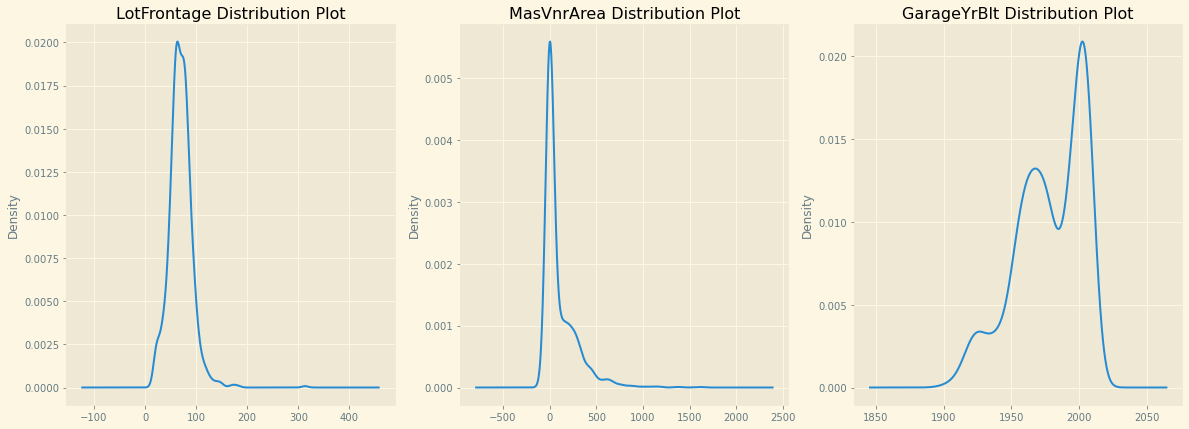

Skewness LotFrontage 1.8847801735623813
Skewness MasVnrArea 2.7582019163711244
Skewness GarageYrBlt -0.6669763943317643


In [79]:
fig,ax = plt.subplots(1,3,figsize=(20,7))

#LotFrontage
X_train_h.LotFrontage.plot(kind='kde',ax=ax[0])
ax[0].set_title('LotFrontage Distribution Plot')

#MasVnrArea
X_train_h.MasVnrArea.plot(kind='kde',ax=ax[1])
ax[1].set_title('MasVnrArea Distribution Plot')

#GarageYrBlt
X_train_h.GarageYrBlt.plot(kind='kde',ax=ax[2])
ax[2].set_title('GarageYrBlt Distribution Plot')

plt.show()

print('Skewness LotFrontage', X_train_h.LotFrontage.skew())
print('Skewness MasVnrArea',X_train_h.MasVnrArea.skew())
print('Skewness GarageYrBlt',X_train_h.GarageYrBlt.skew())

Semua kolom dengan missing value memiliki skew

In [80]:
def impute_na_median(df,variable,median):
    df[variable+'_NA'] = np.where(df[variable].isna(),1,0)
    df[variable].fillna(median,inplace=True)
    
    return df

In [81]:
X_train_h[['LotFrontage','MasVnrArea','GarageYrBlt']].median()

LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [82]:
X_train_h = impute_na_median(X_train_h,'LotFrontage',X_train_h.LotFrontage.median() )
X_train_h = impute_na_median(X_train_h,'MasVnrArea',X_train_h.MasVnrArea.median())
X_train_h = impute_na_median(X_train_h,'GarageYrBlt',X_train_h.GarageYrBlt.median())

In [83]:
X_test_h = impute_na_median(X_test_h,'LotFrontage',X_test_h.LotFrontage.median() )
X_test_h = impute_na_median(X_test_h,'MasVnrArea',X_test_h.MasVnrArea.median())
X_test_h = impute_na_median(X_test_h,'GarageYrBlt',X_test_h.GarageYrBlt.median())

In [84]:
X_test_h

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice,LotFrontage_NA,MasVnrArea_NA,GarageYrBlt_NA
529,6,2035,2515,2515,0,816,70.0,0.0,1975.0,200624,1,1,0
491,6,806,958,1578,0,238,79.0,0.0,1941.0,133000,0,0,0
459,5,709,979,1203,0,524,70.0,161.0,1950.0,110000,1,0,0
279,7,1160,1156,2022,288,768,83.0,299.0,1977.0,192000,0,0,0
655,6,525,525,1092,0,525,21.0,381.0,1971.0,88000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,7,1385,1363,1363,81,96,73.0,0.0,1954.0,241500,0,0,0
445,6,1436,1689,1689,0,1436,73.0,0.0,1956.0,127500,0,0,0
654,8,2109,2113,2113,236,413,91.0,660.0,1995.0,350000,0,0,0
1280,7,1573,1573,1573,0,785,67.0,110.0,2002.0,227000,0,0,0


In [85]:
# With added flag
scaler = StandardScaler()
X_train_h_scaled = scaler.fit_transform(X_train_h.drop('SalePrice',1))
X_test_h_scaled = scaler.transform(X_test_h.drop('SalePrice',1))

# Without added flag
flags = ['LotFrontage_NA','MasVnrArea_NA','GarageYrBlt_NA']
X_train_h_scaled_noflag = scaler.fit_transform(X_train_h.drop(flags+['SalePrice'],1))
X_test_h_scaled_noflag = scaler.transform(X_test_h.drop(flags+['SalePrice'],1))


In [86]:
linreg = LinearRegression()

#fit with no flag and imputed median
linreg.fit(X_train_h_scaled_noflag,y_train_h)

pred_train_noflag  = linreg.predict(X_train_h_scaled_noflag)
pred_test_noflag = linreg.predict(X_test_h_scaled_noflag)

print('Median Imputation without flagging')
print('MSE - Train', mean_squared_error(y_train_h,pred_train_noflag))
print('MSE - Test', mean_squared_error(y_test_h,pred_test_noflag))

Median Imputation without flagging
MSE - Train 1161895545.4832032
MSE - Test 2213352533.0368676


In [87]:
# With Flag
linreg_2 = LinearRegression()

linreg_2.fit(X_train_h_scaled,y_train_h)

pred_train_flag = linreg_2.predict(X_train_h_scaled)
pred_test_flag = linreg_2.predict(X_test_h_scaled)

print('Median Imputation with flagging')
print('MSE - Train', mean_squared_error(y_train_h,pred_train_flag))
print('MSE - Test', mean_squared_error(y_test_h,pred_test_flag))

Median Imputation with flagging
MSE - Train 1157194541.9444427
MSE - Test 2198183078.127069


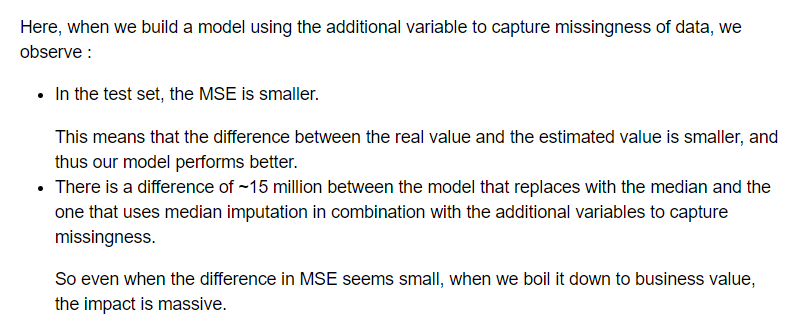

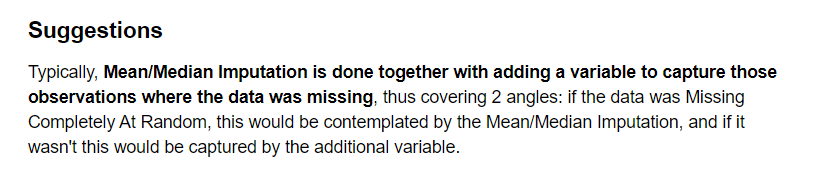

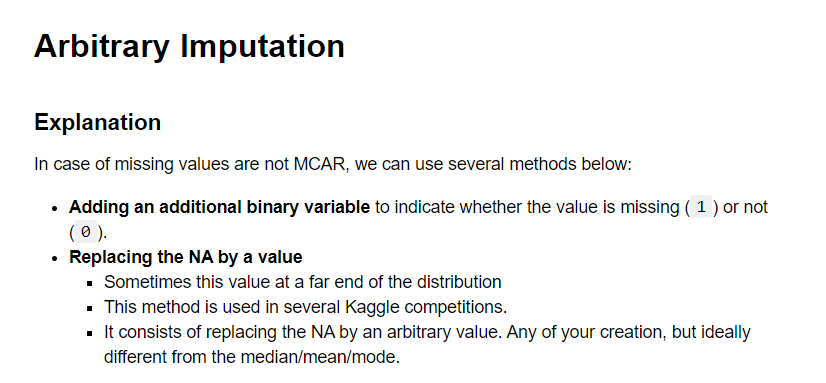

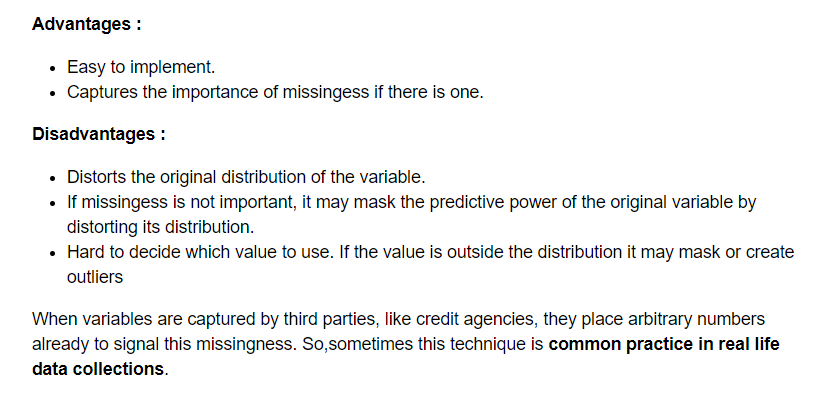

In [88]:
data_titanic_arb = df_titanic.copy()

In [89]:
data_titanic_arb

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [90]:
X_train,X_test,y_train,y_test = train_test_split(data_titanic_arb,data_titanic_arb.Survived,test_size=0.3,random_state=0)

In [91]:
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S


In [92]:
def impute_na(df,variable,mean_value,median_value):
    df[variable + '_mean'] = df[variable].fillna(mean_value)
    df[variable + '_median'] = df[variable].fillna(median_value)
    df[variable + '_zero'] = df[variable].fillna(0)
    df[variable + '_hundred'] = df[variable].fillna(100)
    df[variable + '_random'] = df[variable]
    
    ## Extract Random Sample to impute Na
    random_sample = df[variable].dropna().sample(df[variable].isna().sum(),random_state=0)
    
    ## Pandas needs to have same index in order merge dataset
    random_sample.index = df[df[variable].isna()].index
    
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    
    df[variable + '_NA'] = np.where(df[variable].isna(),1,0)
    return df

In [93]:
age_mean = X_train.Age.mean()
age_median = X_train.Age.median()

In [94]:
X_train =  impute_na(X_train,'Age',age_mean,age_median)
X_test = impute_na(X_test,'Age',age_mean,age_median)

In [95]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_hundred,Age_random,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0,51.0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0,49.0,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0,1.0,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0,54.0,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,100.0,16.0,1


In [96]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train[['Age_zero', 'Fare']], y_train)

pred_zero_train = rf_zero.predict_proba(X_train[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_zero_test[:,1])))
print()

## Model with `Age_hundred`
rf_hundred = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_hundred.fit(X_train[['Age_hundred', 'Fare']], y_train)

pred_hundred_train = rf_hundred.predict_proba(X_train[['Age_hundred', 'Fare']])
pred_hundred_test = rf_hundred.predict_proba(X_test[['Age_hundred', 'Fare']])

print('Using hundred imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_hundred_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_hundred_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train[['Age_mean', 'Fare']], y_train)

pred_mean_train = rf_mean.predict_proba(X_train[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train[['Age_median', 'Fare']], y_train)

pred_median_train = rf_median.predict_proba(X_train[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_random.fit(X_train[['Age_random', 'Fare']], y_train)

pred_random_train = rf_random.predict_proba(X_train[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_random_test[:,1])))
print()

## Model with `Age_mean` and 'Age_NA'
rf_na = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_na.fit(X_train[['Age_mean','Age_NA', 'Fare']], y_train)

pred_na_train = rf_na.predict_proba(X_train[['Age_mean','Age_NA', 'Fare']])
pred_na_test = rf_na.predict_proba(X_test[['Age_mean','Age_NA', 'Fare']])

print('Using mean imputation and add na variable')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_na_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test, pred_na_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7555855621353116
Test - Random Forests roc-auc. : 0.7490476190476191

Using hundred imputation
Train - Random Forests roc-auc : 0.7490781111038807
Test - Random Forests roc-auc. : 0.7653571428571428

Using mean imputation
Train - Random Forests roc-auc : 0.751648554261296
Test - Random Forests roc-auc  : 0.7698809523809523

Using median imputation
Train - Random Forests roc-auc : 0.7515021366130887
Test - Random Forests roc-auc. : 0.7697619047619049

Using random sample imputation
Train - Random Forests roc-auc : 0.7542027287911325
Test - Random Forests roc-auc. : 0.7532142857142858

Using mean imputation and add na variable
Train - Random Forests roc-auc : 0.7629281360491095
Test - Random Forests roc-auc  : 0.7517559523809524



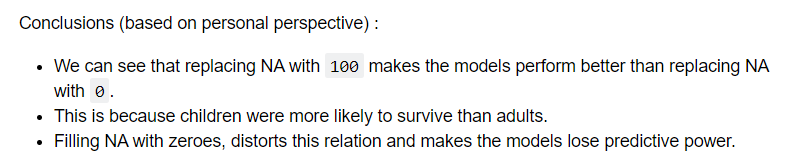

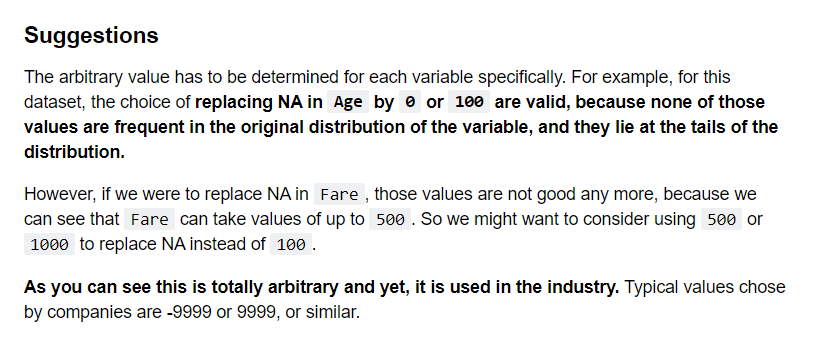

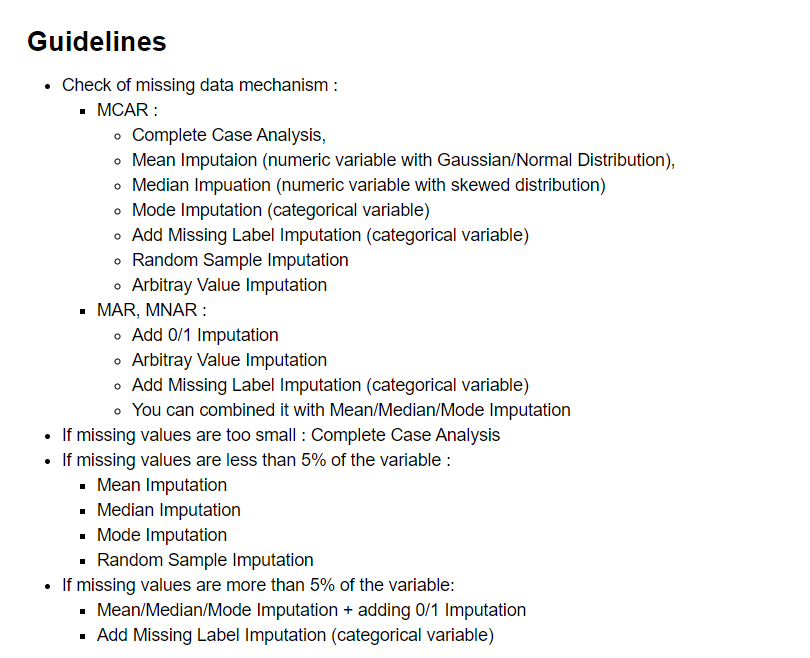

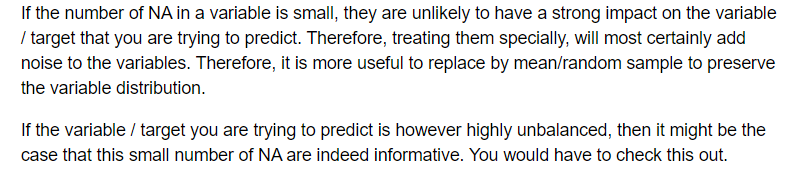

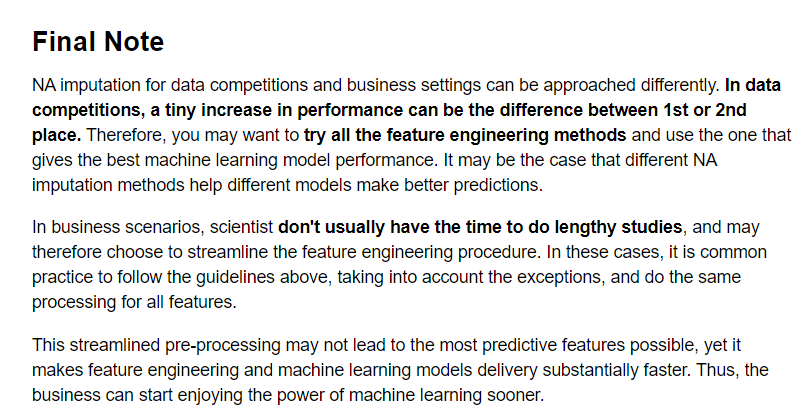

## One Hot Encoding 

In [97]:
df_titanic['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [98]:
pd.get_dummies(df_titanic,columns=['Sex'])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,1


## Label Encoder

In [99]:
from sklearn.preprocessing import LabelEncoder

LabelEnc = LabelEncoder()

In [101]:
df_titanic['sex_label'] = LabelEnc.fit_transform(df_titanic.Sex)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


## Outlier Handling 

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [104]:
boston_dataset = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2PM%20-%20Feature%20Engineering%20-%20Part%202%20-%20Boston.csv')
boston_dataset

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


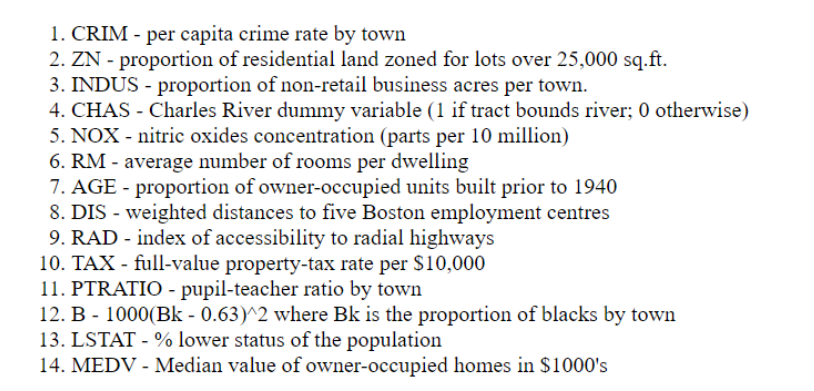

In [105]:
boston = boston_dataset[['RM','LSTAT','CRIM']]

In [106]:
boston

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905
...,...,...,...
501,6.593,9.67,0.06263
502,6.120,9.08,0.04527
503,6.976,5.64,0.06076
504,6.794,6.48,0.10959


In [107]:
# buat function diagnostic plots yang akan menampilkan histogram dan boxplot

def diagnostic_plots(df,variable):
    plt.figure(figsize=(16,4))
    
    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[variable],bins=30)
    plt.title('Histogram')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('boxplot')
    
    plt.show()

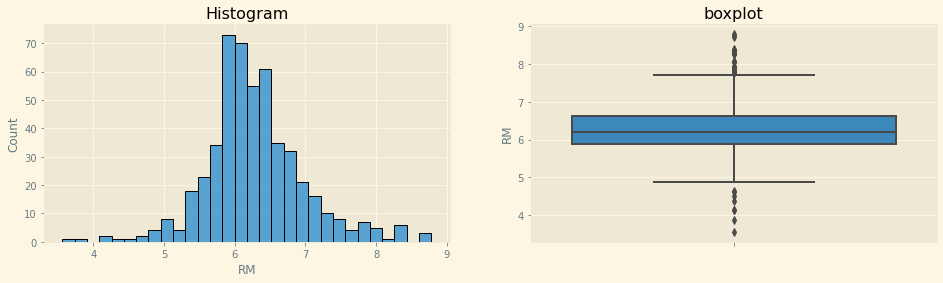


 Skewness of RM 0.40361213328874385


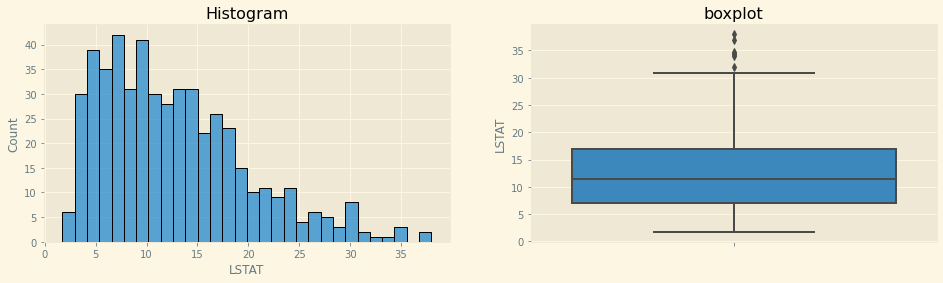


 skewness of LSTAT: 0.9064600935915367


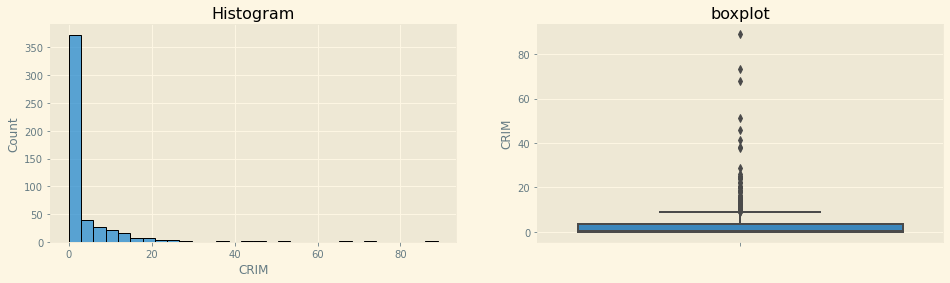


 skewness of CRIM 5.223148798243851


In [109]:
diagnostic_plots(boston, 'RM')
print('\n Skewness of RM',boston.RM.skew())

diagnostic_plots(boston,'LSTAT')
print('\n skewness of LSTAT:',boston.LSTAT.skew())

diagnostic_plots(boston, 'CRIM')
print('\n skewness of CRIM', boston.CRIM.skew())

RM berdistribusi normal, sedangkan LSTAT dan juga CRIM highly terdapat positive skewed.

In [110]:
# Buat function untuk kolom-kolom yang terdistribusi normal dan skewed

#Normal
def find_normal_boundaries(df,variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 *df[variable].std()
    
    return upper_boundary,lower_boundary

# Skewed
def find_skewed_boundaries(df,variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    lower_boundary = df[variable].quantile(0.25) - (1.5 * IQR)
    upper_boundary = df[variable].quantile(0.75) +(1.5 * IQR)
    return upper_boundary,lower_boundary

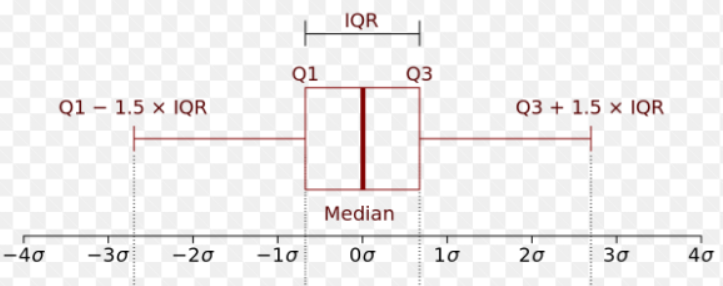

In [111]:
find_normal_boundaries(boston,'RM')

(8.392485817597757, 4.176782957105816)

Nilai upper boundary RM = 8.4
Nilai lower boundary RM = 4.17

In [112]:
upper_boundary_RM,lower_boundary_RM = find_normal_boundaries(boston,'RM')

In [113]:
upper_boundary_RM

8.392485817597757

In [114]:
print('Total Number of Houses', len(boston))
print('Houses with more than 8.4 rooms', len(boston[boston.RM>upper_boundary_RM]))
print('Houses with less than 4.17 rooms', len(boston[boston.RM<lower_boundary_RM]))

Total Number of Houses 506
Houses with more than 8.4 rooms 4
Houses with less than 4.17 rooms 4


In [115]:
# Untuk menghitung outliers pada data RM
8/506*100

1.5810276679841897

Terdapat 1.58% data outliers

In [116]:
upper_boundary_CRIM,lower_boundary_CRIM = find_skewed_boundaries(boston,'CRIM')

In [117]:
print(upper_boundary_CRIM,lower_boundary_CRIM)

9.06963875 -5.31051125


In [118]:
print('Total houses',len(boston))
print('Houses with CRIM bigger than 9 :', len(boston[boston.CRIM>upper_boundary_CRIM]))

Total houses 506
Houses with CRIM bigger than 9 : 66


In [119]:
# Untuk menghitung outliers pada data CRIM
66/506*100

13.043478260869565

Terdapat 13.04% data outliers pada CRIM

In [120]:
upper_boundary_LSTAT,lower_boundary_LSTAT = find_skewed_boundaries(boston,'LSTAT')

In [121]:
upper_boundary_LSTAT,lower_boundary_LSTAT

(31.962500000000006, -8.057500000000005)

In [122]:
print('Total Houses :',len(boston))
print('Houses with LSTAT bigger than 32 :', len(boston[boston.LSTAT>upper_boundary_LSTAT]))

Total Houses : 506
Houses with LSTAT bigger than 32 : 7


In [124]:
# Untuk menghitung outliers pada data LSTAT
7/506*100

1.383399209486166

Terdapat 1.38% data outliers pada LSTAT

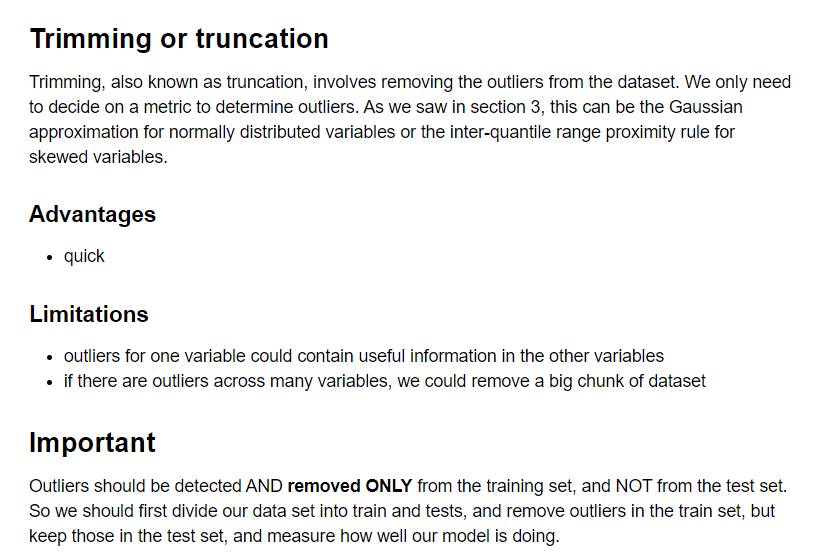

In [126]:
boston = boston_dataset[['DIS','LSTAT','CRIM']]
boston.head()

,DIS,LSTAT,CRIM
0,4.0900,4.98,0.00632
1,4.9671,9.14,0.02731
2,4.9671,4.03,0.02729
3,6.0622,2.94,0.03237
4,6.0622,5.33,0.06905


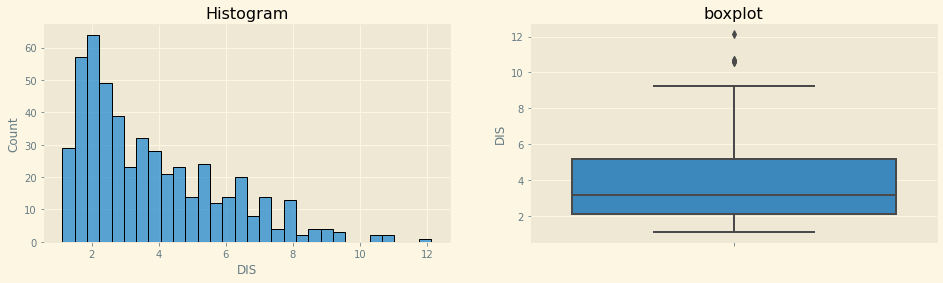

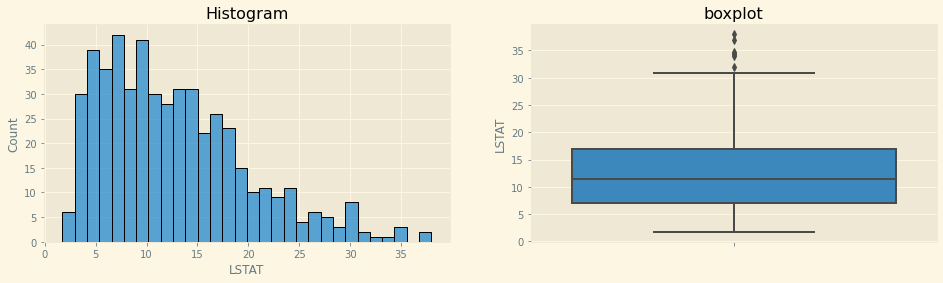

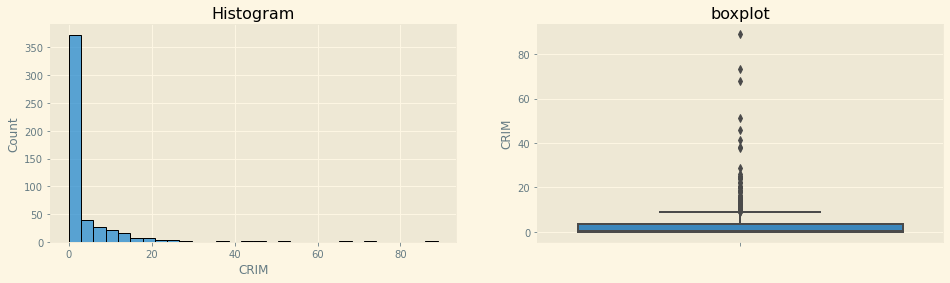

In [127]:
diagnostic_plots(boston,'DIS')
diagnostic_plots(boston,'LSTAT')
diagnostic_plots(boston,'CRIM')

In [128]:
print('Skewness of DIS :', boston.DIS.skew())

Skewness of DIS : 1.0117805793009007


In [129]:
upper_boundary_DIS,lower_boundary_DIS = find_skewed_boundaries(boston,'DIS')
upper_boundary_DIS,lower_boundary_DIS

(9.820800000000002, -2.5322000000000005)

In [130]:
upper_boundary_CRIM, lower_boundary_CRIM

(9.06963875, -5.31051125)

In [131]:
upper_boundary_LSTAT, lower_boundary_LSTAT

(31.962500000000006, -8.057500000000005)

In [132]:
#Trimming
outliers_DIS = np.where(boston.DIS>upper_boundary_DIS, True, 
                        np.where(boston.DIS<lower_boundary_DIS,True,False))
outliers_CRIM = np.where(boston.CRIM>upper_boundary_CRIM,True,
                        np.where(boston.CRIM<lower_boundary_CRIM,True,False))
outliers_LSTAT = np.where(boston.LSTAT>upper_boundary_LSTAT,True,
                         np.where(boston.LSTAT<lower_boundary_LSTAT,True,False))

In [133]:
outliers_CRIM[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [134]:
boston_trimmed  = boston[~(outliers_DIS+outliers_LSTAT+outliers_CRIM)]

In [135]:
print(boston.shape)

(506, 3)


In [136]:
print(boston_trimmed.shape)

(434, 3)


In [137]:
72/506*100

14.229249011857709

Kita dapat melihat bahwa dengan menggunakan trimming, **kami menghapus 72 baris**, dari dataset yang terdiri dari 506 baris, ini adalah sekitar **~14,2%** dari data yang dihapus. Inilah sebagian besar alasan mengapa kita cenderung tidak banyak menggunakan pemangkasan dalam pembelajaran mesin. Tetapi jika hanya beberapa variabel yang memiliki proporsi outlier yang kecil, pemangkasan dapat digunakan.

DIS before trim


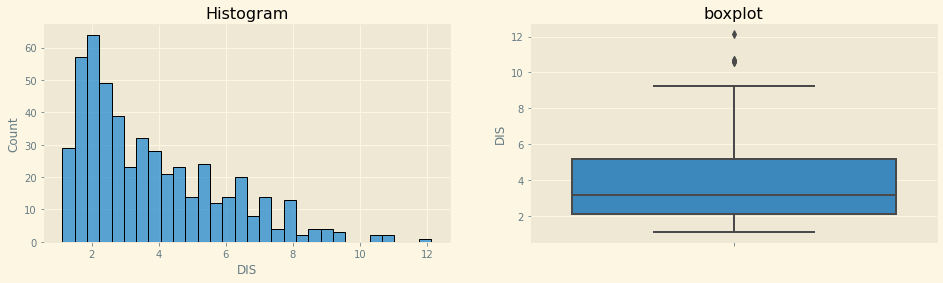

DIS after trimmed


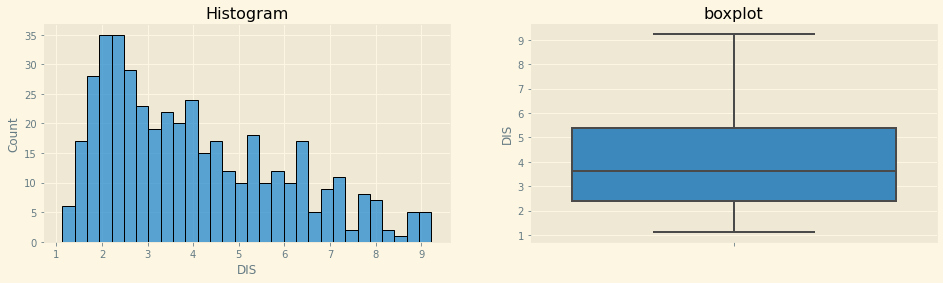

In [140]:
print('DIS before trim')
diagnostic_plots(boston,'DIS')
print('DIS after trimmed')
diagnostic_plots(boston_trimmed,'DIS')

CRIM before trim


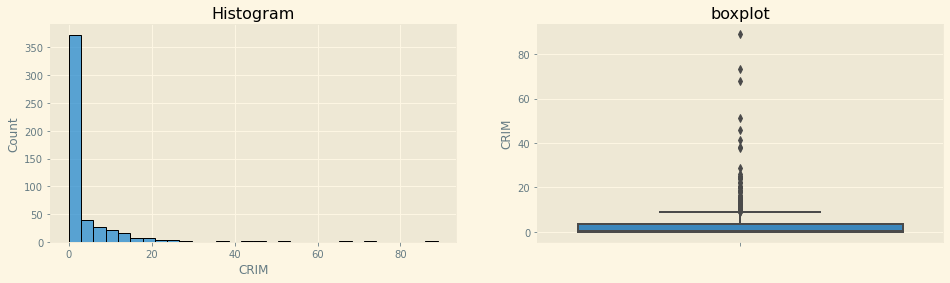


 CRIM after trimmed


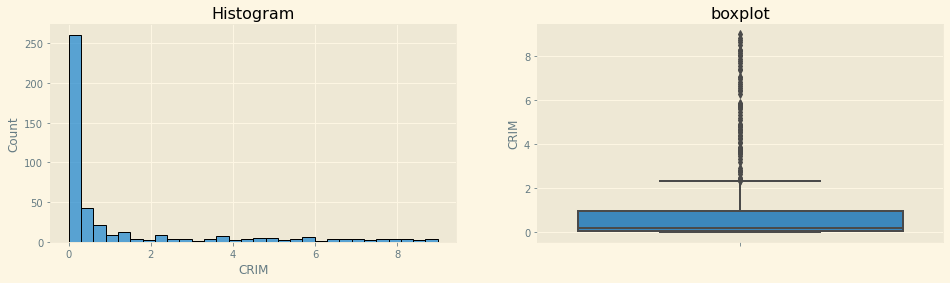

In [141]:
print('CRIM before trim')
diagnostic_plots(boston,'CRIM')
print('\n CRIM after trimmed')
diagnostic_plots(boston_trimmed,'CRIM')

<AxesSubplot:xlabel='CRIM'>

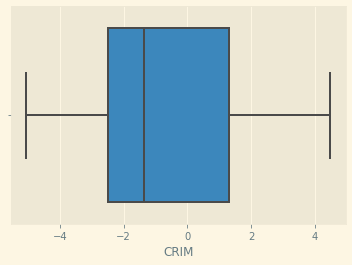

In [142]:
# Log transformasi
sns.boxplot(np.log(boston.CRIM))

## Censoring or Capping

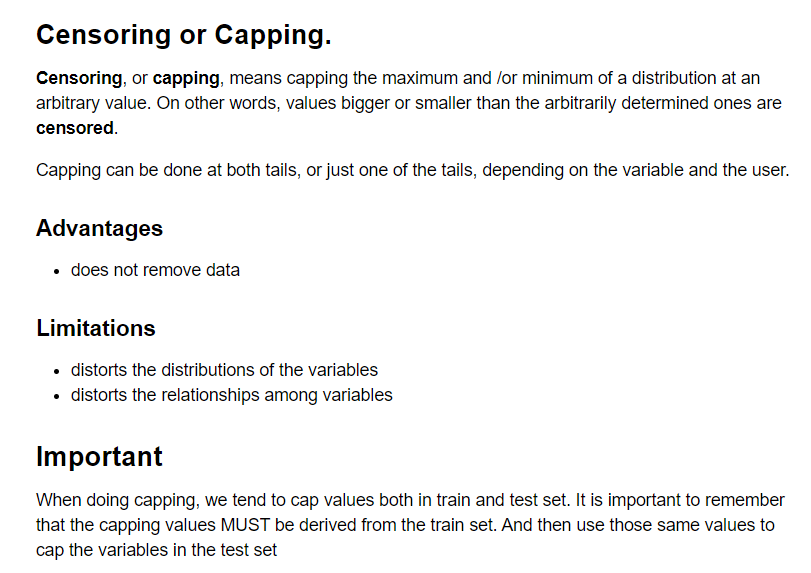

In [143]:
!pip install feature-engine

from feature_engine.outliers import Winsorizer

In [144]:
boston.head()

,DIS,LSTAT,CRIM
0,4.0900,4.98,0.00632
1,4.9671,9.14,0.02731
2,4.9671,4.03,0.02729
3,6.0622,2.94,0.03237
4,6.0622,5.33,0.06905


In [145]:
winsor = Winsorizer(capping_method = 'iqr',
                   tail = 'both',
                   fold=1.5,
                   variables=['DIS','LSTAT','CRIM'])
boston_t = winsor.fit_transform(boston)

In [147]:
print(boston_t.shape)

(506, 3)


In [148]:
winsor.left_tail_caps_ #lower boundary

{'DIS': -2.5322000000000005, 'LSTAT': -8.057500000000005, 'CRIM': -5.31051125}

In [149]:
winsor.right_tail_caps_ #upper boundary

{'DIS': 9.820800000000002, 'LSTAT': 31.962500000000006, 'CRIM': 9.06963875}

In [150]:
print('Boston - Before Capping')
print(boston.describe())

print('\n Boston - After Capping')
print(boston_t.describe())

Boston - Before Capping
              DIS       LSTAT        CRIM
count  506.000000  506.000000  506.000000
mean     3.795043   12.653063    3.613524
std      2.105710    7.141062    8.601545
min      1.129600    1.730000    0.006320
25%      2.100175    6.950000    0.082045
50%      3.207450   11.360000    0.256510
75%      5.188425   16.955000    3.677083
max     12.126500   37.970000   88.976200

 Boston - After Capping
              DIS       LSTAT        CRIM
count  506.000000  506.000000  506.000000
mean     3.783947   12.612011    2.225032
std      2.069765    7.016829    3.313353
min      1.129600    1.730000    0.006320
25%      2.100175    6.950000    0.082045
50%      3.207450   11.360000    0.256510
75%      5.188425   16.955000    3.677083
max      9.820800   31.962500    9.069639


DIS before capping


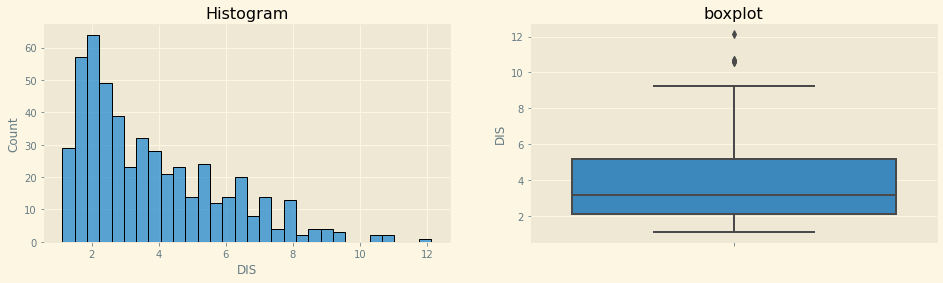


 DIS after capping


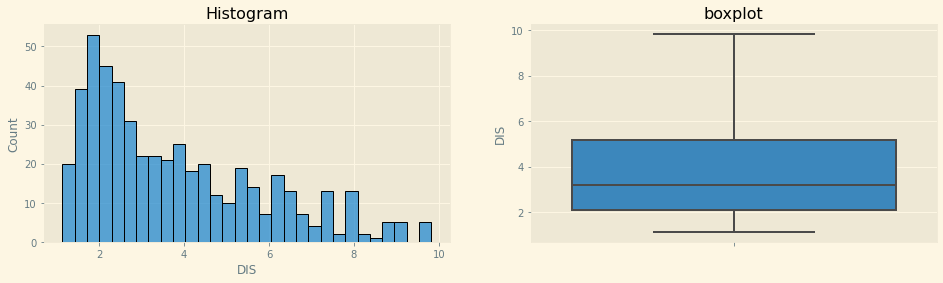

In [151]:
print('DIS before capping')
diagnostic_plots(boston,'DIS')
print('\n DIS after capping')
diagnostic_plots(boston_t,'DIS')

CRIM before capping


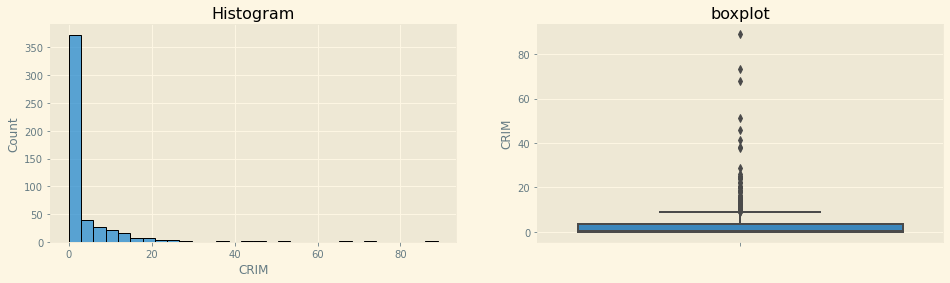


 CRIM after capping


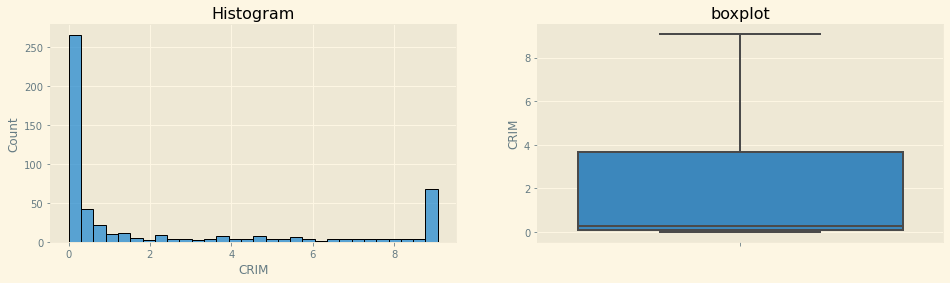

In [152]:
print('CRIM before capping')
diagnostic_plots(boston,'CRIM')
print('\n CRIM after capping')
diagnostic_plots(boston_t,'CRIM')

## Cardinality

In [153]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split

In [154]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [156]:
url = 'https://www.openml.org/data/get_csv/16826755/phpMYEkMl'
data2 = pd.read_csv(url)
data2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [202]:
data2.cabin.unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', '?', 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

In [201]:
data.cabin.nunique()

187

In [159]:
data['cabin_reduced'] = data.cabin.str[0]
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_reduced
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO",B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON",C
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON",C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?,?


In [160]:
print(data.cabin.nunique())

187


In [161]:
print(data.cabin_reduced.nunique())

9


Terjadi pengurangan unik value pada data cabin

In [203]:
use_cols = ['cabin','cabin_reduced','sex']

In [207]:
X_train,X_test,y_train,y_test = train_test_split(data[use_cols],data['survived'],test_size=0.3,random_state=0)

In [208]:
X_train.cabin.nunique()

151

In [209]:
X_test.cabin.nunique()

71

In [210]:
X_train.cabin_reduced.nunique()

9

In [211]:
X_test.cabin_reduced.nunique()

8

## Effect of Cardinality to ML performance

In [212]:
from sklearn.preprocessing import LabelEncoder

In [213]:
labelencoder = LabelEncoder()

In [214]:
cabin_dict = {k:i for i ,k in enumerate(X_train.cabin.unique(),0)}

In [215]:
print('total cabin unique X_train:',len(X_train.cabin.unique()))
print('total cabin unique data', len(data.cabin.unique()))

total cabin unique X_train: 151
total cabin unique data 187


In [216]:
print(cabin_dict)

{'?': 0, 'E36': 1, 'C68': 2, 'E24': 3, 'C22 C26': 4, 'D38': 5, 'B50': 6, 'A24': 7, 'C111': 8, 'F': 9, 'C6': 10, 'C87': 11, 'E8': 12, 'B45': 13, 'C93': 14, 'D28': 15, 'D36': 16, 'C125': 17, 'B35': 18, 'T': 19, 'B73': 20, 'B57 B59 B63 B66': 21, 'A26': 22, 'A18': 23, 'B96 B98': 24, 'G6': 25, 'C78': 26, 'C101': 27, 'D9': 28, 'D33': 29, 'C128': 30, 'E50': 31, 'B26': 32, 'B69': 33, 'E121': 34, 'C123': 35, 'B94': 36, 'A34': 37, 'D': 38, 'C39': 39, 'D43': 40, 'E31': 41, 'B5': 42, 'D17': 43, 'F33': 44, 'E44': 45, 'D7': 46, 'A21': 47, 'D34': 48, 'A29': 49, 'D35': 50, 'A11': 51, 'B51 B53 B55': 52, 'D46': 53, 'E60': 54, 'C30': 55, 'D26': 56, 'E68': 57, 'A9': 58, 'B71': 59, 'D37': 60, 'F2': 61, 'C55 C57': 62, 'C89': 63, 'C124': 64, 'C23 C25 C27': 65, 'C126': 66, 'E49': 67, 'F E46': 68, 'E46': 69, 'D19': 70, 'B58 B60': 71, 'C82': 72, 'B52 B54 B56': 73, 'C92': 74, 'E45': 75, 'F G73': 76, 'C65': 77, 'E25': 78, 'B3': 79, 'D40': 80, 'C91': 81, 'B102': 82, 'B61': 83, 'F G63': 84, 'A20': 85, 'B36': 86, 'C

In [217]:
X_train['cabin_mapped'] = X_train['cabin'].map(cabin_dict)
X_test ['cabin_mapped'] = X_test['cabin'].map(cabin_dict)

In [218]:
X_train.sample(10)

,cabin,cabin_reduced,sex,cabin_mapped
1083,?,?,male,0
105,A29,A,female,49
285,C55 C57,C,male,62
728,?,?,male,0
727,?,?,male,0
106,C95,C,male,116
627,?,?,female,0
620,?,?,male,0
861,?,?,female,0
67,B77,B,female,88


In [219]:
X_test.sample(10)

,cabin,cabin_reduced,sex,cabin_mapped
252,B57 B59 B63 B66,B,male,21.0
1072,?,?,male,0.0
61,C46,C,female,NaN
399,?,?,male,0.0
249,B57 B59 B63 B66,B,male,21.0
649,?,?,male,0.0
895,?,?,female,0.0
322,C32,C,female,NaN
267,A7,A,male,NaN
351,?,?,male,0.0


In [221]:
cabin_reduced_dict = {k:i for i,k in enumerate(X_train.cabin_reduced.unique(),0)}

print('Before Replace')
print(X_train[['cabin_reduced','cabin']].head(10))

Before Replace
     cabin_reduced cabin
501              ?     ?
588              ?     ?
402              ?     ?
1193             ?     ?
686              ?     ?
971              ?     ?
117              E   E36
540              ?     ?
294              C   C68
261              E   E24


In [222]:
X_train['cabin_reduced'] = X_train['cabin_reduced'].map(cabin_reduced_dict)
X_test['cabin_reduced'] = X_test['cabin_reduced'].map(cabin_reduced_dict)

In [241]:
X_test['cabin_mapped'].fillna(0,inplace=True)

In [223]:
X_test.cabin_reduced.isna().sum()

0

In [224]:
print('after replace')
print(X_train[['cabin_reduced','cabin']].head(10))

after replace
      cabin_reduced cabin
501               0     ?
588               0     ?
402               0     ?
1193              0     ?
686               0     ?
971               0     ?
117               1   E36
540               0     ?
294               2   C68
261               1   E24


In [225]:
sex_dict = {'male':0,'female':1}

X_train['sex'] = X_train['sex'].map(sex_dict)
X_test['sex'] = X_test['sex'].map(sex_dict)

In [226]:
X_train

,cabin,cabin_reduced,sex,cabin_mapped
501,?,0,1,0
588,?,0,1,0
402,?,0,1,0
1193,?,0,0,0
686,?,0,1,0
...,...,...,...,...
763,?,0,1,0
835,?,0,0,0
1216,?,0,1,0
559,?,0,1,0


In [234]:
X_train.cabin_mapped

501     0
588     0
402     0
1193    0
686     0
       ..
763     0
835     0
1216    0
559     0
684     0
Name: cabin_mapped, Length: 916, dtype: int64

In [242]:
rf = RandomForestClassifier(n_estimators=200,random_state=39)

rf.fit(X_train[['sex','cabin_mapped']],y_train)

pred_train = rf.predict_proba(X_train[['sex','cabin_mapped']])
pred_test = rf.predict_proba(X_test[['sex','cabin_mapped']])

In [243]:
print('Train Set')
print('RF ROC-AUC Train:', roc_auc_score(y_train,pred_train[:,1]))

Train Set
RF ROC-AUC Train: 0.8554184130945611


In [244]:
print('Test Set')
print('RF ROC-AUC Test:', roc_auc_score(y_test,pred_test[:,1]))

Test Set
RF ROC-AUC Test: 0.7707400033184005


Overfitting terjadi pada model karena high cardinality

In [245]:
rf = RandomForestClassifier(n_estimators=200,random_state=39)

rf.fit(X_train[['cabin_reduced','sex']],y_train)

pred_train = rf.predict_proba(X_train[['cabin_reduced','sex']])
pred_test = rf.predict_proba(X_test[['cabin_reduced','sex']])

In [246]:
print('Train Set')
print('RF ROC-AUC Train:', roc_auc_score(y_train,pred_train[:,1]))

Train Set
RF ROC-AUC Train: 0.8163420365403872


In [247]:
print('Test Set')
print('RF ROC-AUC Test:', roc_auc_score(y_test,pred_test[:,1]))

Test Set
RF ROC-AUC Test: 0.8017670482827277


## Hyperparameter Tuning

In [248]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

dataset = load_breast_cancer()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3 ,random_state=101)

In [249]:
model = SVC()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [250]:
param_grid = {'C': [0.1,1,10,100],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'gamma':['scale','auto'],
              'kernel':['linear']
    
}

In [251]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,n_jobs=-1,scoring='accuracy')
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear']},
             scoring='accuracy', verbose=3)

In [252]:
print(grid.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [253]:
grid.best_score_

0.9673417721518988

In [254]:
model_tuned = grid.best_estimator_

In [255]:
pred_tuned = model_tuned.predict(X_test)

In [256]:
# Sebelum Tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [257]:
# Setelah Tuning
print(classification_report(y_test,pred_tuned))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.94      0.98      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

